In [0]:
from datetime import datetime
import numpy as np
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [0]:
stockSymbols = ["FB", "AMZN", "AAPL", "NFLX", "GOOG"]

In [0]:
stockStartDate = '2013-01-01'

In [4]:
today = datetime.today().strftime('%Y-%m-%d')

print(today)

2020-01-31


In [6]:
numAssets = len(stockSymbols)
print('You have '+ str(numAssets)+ ' assets in your portfolio')

You have 5 assets in your portfolio


In [0]:
def getMyPortfolio(stocks= stockSymbols, start = stockStartDate, end = today, col='Adj Close'):
    data =  web.DataReader(stocks, data_source='yahoo', start=start, end=end)[col]
    return data

In [8]:
my_stocks = getMyPortfolio(stockSymbols)
my_stocks

Symbols,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,28.000000,257.309998,68.850548,13.144286,360.274597
2013-01-03,27.770000,258.480011,67.981491,13.798572,360.483826
2013-01-04,28.760000,259.149994,66.087891,13.711429,367.607117
2013-01-07,29.420000,268.459991,65.699158,14.171429,366.003143
2013-01-08,29.059999,266.380005,65.875954,13.880000,365.280823
...,...,...,...,...,...
2020-01-24,217.940002,1861.640015,318.309998,353.160004,1466.709961
2020-01-27,214.869995,1828.339966,308.950012,342.880005,1433.900024
2020-01-28,217.789993,1853.250000,317.690002,348.519989,1452.560059


In [0]:
def showGraph(stocks= stockSymbols,start=stockStartDate, end=today, col='Adj Close'):
  title = 'Portfolio ' + col + ' Price History'
  my_stocks = getMyPortfolio(stocks= stocks, start=start, end=end, col = col)
  plt.figure(figsize=(12.2,4.5))
  for c in my_stocks.columns.values:
    plt.plot( my_stocks[c],  label=c)
  plt.title(title)
  plt.xlabel('Date',fontsize=18)
  plt.ylabel(col +' Price USD ($)',fontsize=18)
  plt.legend(my_stocks.columns.values, loc='upper left')
  plt.show()

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


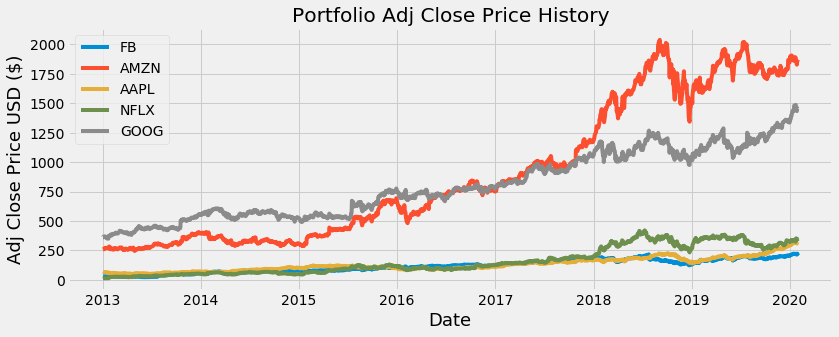

In [11]:
showGraph(stockSymbols)

In [12]:
daily_simple_returns = my_stocks.pct_change(1)
daily_simple_returns

Symbols,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.008214,0.004547,-0.012622,0.049777,0.000581
2013-01-04,0.035650,0.002592,-0.027855,-0.006315,0.019760
2013-01-07,0.022949,0.035925,-0.005882,0.033549,-0.004363
2013-01-08,-0.012237,-0.007748,0.002691,-0.020565,-0.001974
...,...,...,...,...,...
2020-01-24,-0.008282,-0.012172,-0.002882,0.010183,-0.013413
2020-01-27,-0.014086,-0.017887,-0.029405,-0.029109,-0.022370
2020-01-28,0.013590,0.013624,0.028289,0.016449,0.013013


In [13]:
daily_simple_returns.corr()

Symbols,FB,AMZN,AAPL,NFLX,GOOG
Symbols,,,,,
FB,1.000000,0.477586,0.343280,0.315247,0.493784
AMZN,0.477586,1.000000,0.376513,0.408045,0.586689
AAPL,0.343280,0.376513,1.000000,0.200379,0.429264
NFLX,0.315247,0.408045,0.200379,1.000000,0.392898
GOOG,0.493784,0.586689,0.429264,0.392898,1.000000


In [14]:
daily_simple_returns.cov()

Symbols,FB,AMZN,AAPL,NFLX,GOOG
Symbols,,,,,
FB,0.000418,0.000180,0.000110,0.000186,0.000148
AMZN,0.000180,0.000340,0.000109,0.000217,0.000159
AAPL,0.000110,0.000109,0.000247,0.000091,0.000099
NFLX,0.000186,0.000217,0.000091,0.000833,0.000166
GOOG,0.000148,0.000159,0.000099,0.000166,0.000215


In [15]:
daily_simple_returns.var()

Symbols
FB      0.000418
AMZN    0.000340
AAPL    0.000247
NFLX    0.000833
GOOG    0.000215
dtype: float64

In [16]:
print("The Stock Volatility:")
daily_simple_returns.std()

The Stock Volatility:


Symbols
FB      0.020452
AMZN    0.018449
AAPL    0.015705
NFLX    0.028857
GOOG    0.014662
dtype: float64

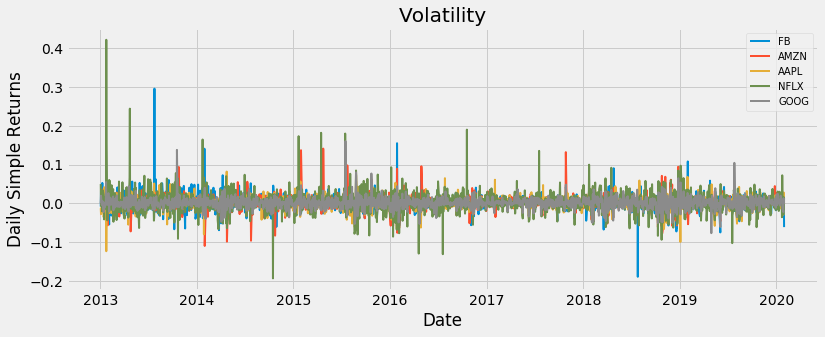

In [17]:
plt.figure(figsize=(12,4.5))
for c in daily_simple_returns.columns.values:
  plt.plot(daily_simple_returns.index, daily_simple_returns[c], lw=2, label=c)
plt.legend(loc='upper right', fontsize=10) 
plt.title('Volatility')
plt.ylabel('Daily Simple Returns')
plt.xlabel('Date')
plt.show()

In [19]:
dailyMeanSimpleReturns = daily_simple_returns.mean() 
print("The daily mean simple return: ")
print(dailyMeanSimpleReturns)

The daily mean simple return: 
Symbols
FB      0.001336
AMZN    0.001284
AAPL    0.000994
NFLX    0.002241
GOOG    0.000891
dtype: float64


In [20]:
randomWeights = np.array([0.4, 0.1, 0.3,0.1,0.1])
portfolioSimpleReturn = np.sum(dailyMeanSimpleReturns*randomWeights)
print("The daily expected portfolio return: " +str(portfolioSimpleReturn))

The daily expected portfolio return: 0.0012740703090774587


In [21]:
print("Expected annualised portfolio simple return : "+ str(portfolioSimpleReturn * 253))

Expected annualised portfolio simple return : 0.32233978819659703


In [22]:
dailyCumulSimplReturn = (daily_simple_returns+1).cumprod()
dailyCumulSimplReturn

Symbols,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,0.991786,1.004547,0.987378,1.049777,1.000581
2013-01-04,1.027143,1.007151,0.959875,1.043147,1.020353
2013-01-07,1.050714,1.043333,0.954229,1.078144,1.015900
2013-01-08,1.037857,1.035249,0.956796,1.055972,1.013896
...,...,...,...,...,...
2020-01-24,7.783572,7.235008,4.623202,26.867949,4.071089
2020-01-27,7.673928,7.105592,4.487256,26.085860,3.980020
2020-01-28,7.778214,7.202402,4.614197,26.514942,4.031814


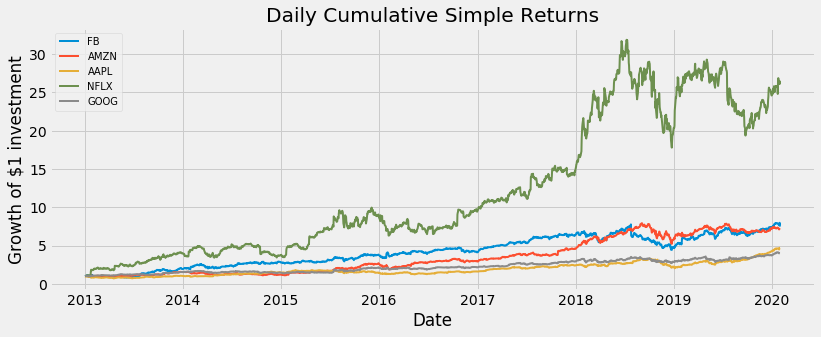

In [24]:
fig = plt.figure(figsize=(12.2,4.5))
for c in dailyCumulSimplReturn.columns.values:
  plt.plot(dailyCumulSimplReturn.index, dailyCumulSimplReturn[c], lw=2, label=c)
plt.legend(loc='upper left', fontsize=10) 
plt.xlabel("Date")
plt.ylabel("Growth of $1 investment")
plt.title("Daily Cumulative Simple Returns")
plt.show()